# Reviewer

## A general digital communication system

A general digital communication system block diagram is shown in figure below.

<img src="general_digital_communication_system.png" style="width: 600px;"/>

In [4]:
import numpy as num
import matplotlib.pyplot as plt
import sk_dsp_comm.sigsys as ss

In last class, we created a bit stream and formatted it with SRC (square root raised cosine) or RC (raised cosine) pulse shape. We can use the function NRZ_bits to generate non-return-to-zero (NRZ) data bits with pulse shaping (RECT - SRC - RC).

In [5]:
N  = 2**12; # number of bits
Fb = 10;    # bit rate   [bps]
Tb = 1/Fb;  # Bit period [s]
Ns = 16;    # samples per bit
Fs = Fb*Ns  # sample rate

In [6]:
x1, b1, d1 = ss.NRZ_bits(N, Ns, 'rect');
alpha = 0.35;
x2, b2, d2 = ss.NRZ_bits(N, Ns, 'src', alpha);
t1 = num.arange(0,N/Fb,1/Fs);
NFFT  = N * Ns/2;
f1, X1 = ss.ft_approx(x1, t1, NFFT);
f2, X2 = ss.ft_approx(x2, t1, NFFT);

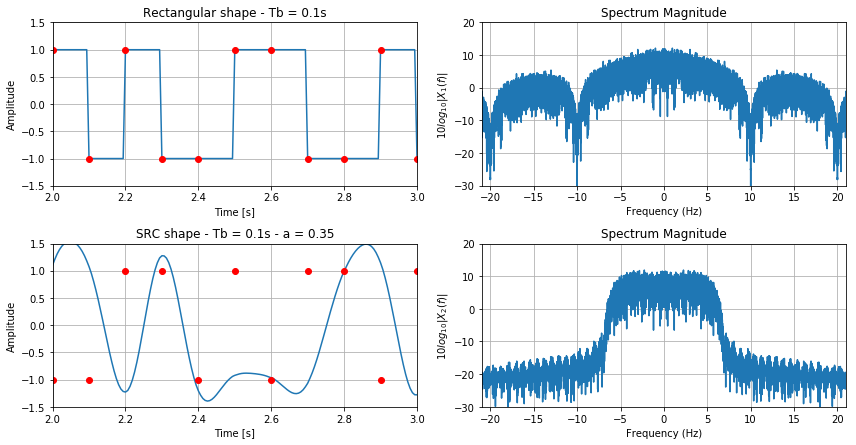

In [7]:
plt.figure(figsize=(12,12))
plt.subplot(421)
plt.plot(t1, x1,
         t1[0::Ns], 2*d1-1, 'ro');
plt.grid();
plt.xlim([2,3]);
plt.ylim([-1.5,1.5]);
plt.title(r'Rectangular shape - Tb = ' + repr(Tb) + 's');
plt.xlabel(r'Time [s]');
plt.ylabel(r'Amplitude');

plt.subplot(422)
plt.plot(f1, 10*num.log10(num.abs(X1)));
plt.grid()
plt.xlim([-21,21])
plt.ylim([-30,20])
plt.title(r'Spectrum Magnitude')
plt.xlabel(r'Frequency (Hz)')
plt.ylabel(r'$10log_{10}|X_1(f)|$');

plt.subplot(423)
plt.plot(t1, x2,
         t1[0::Ns], 2*d2-1, 'ro');
plt.grid();
plt.xlim([2,3]);
plt.ylim([-1.5,1.5]);
plt.title(r'SRC shape - Tb = ' + repr(Tb) + 's - a = ' + repr(alpha));
plt.xlabel(r'Time [s]');
plt.ylabel(r'Amplitude');

plt.subplot(424)
plt.plot(f2, 10*num.log10(num.abs(X2)));
plt.grid()
plt.xlim([-21,21]);
plt.ylim([-30,20])
plt.title(r'Spectrum Magnitude')
plt.xlabel(r'Frequency (Hz)')
plt.ylabel(r'$10 log_{10}|X_2(f)|$');
plt.tight_layout()

To see the pulse shape effect in the digital system, we create the BPSK modulated signal using two frequencies (10 Hz and 25 Hz) and evaluate the interpose between their spectrums.

In [4]:
Fc1 = 10; # Carrier #01 - 10 Hz
Fc2 = 25; # Carrier #02 - 25 Hz

# RECT shape
x1_c = x1*num.cos(2*num.pi*Fc1*t1);
x3_c = x1*num.cos(2*num.pi*Fc2*t1);
f1, X1_c = ss.ft_approx(x1_c, t1, NFFT);
f1, X3_c = ss.ft_approx(x3_c, t1, NFFT);
# SRC shape
x2_c = x2*num.cos(2*num.pi*Fc1*t1);
x4_c = x2*num.cos(2*num.pi*Fc2*t1);
f2, X2_c = ss.ft_approx(x2_c, t1, NFFT);
f2, X4_c = ss.ft_approx(x4_c, t1, NFFT);

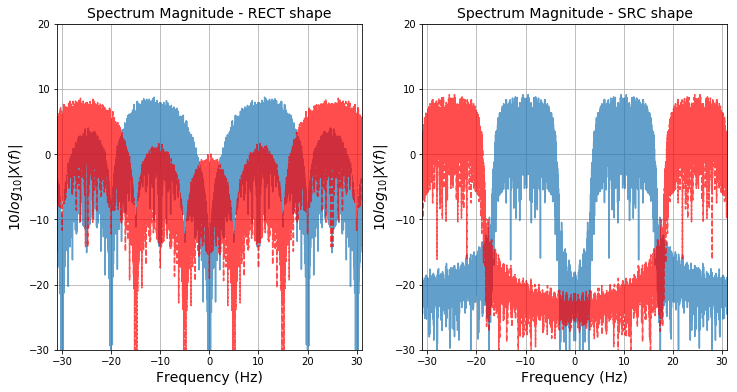

In [5]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(f1, 10*num.log10(num.abs(X1_c)),
         f2, 10*num.log10(num.abs(X3_c)), 'r--', alpha = 0.70);
plt.grid()
plt.xlim([-31,31])
plt.ylim([-30,20])
plt.title(r'Spectrum Magnitude - RECT shape', fontsize = 14)
plt.xlabel(r'Frequency (Hz)', fontsize = 14)
plt.ylabel(r'$10log_{10}|X(f)|$', fontsize = 14);

plt.subplot(122)
plt.plot(f1, 10*num.log10(num.abs(X2_c)),
         f2, 10*num.log10(num.abs(X4_c)), 'r--', alpha = 0.70);
plt.grid()
plt.xlim([-31,31])
plt.ylim([-30,20])
plt.title(r'Spectrum Magnitude - SRC shape', fontsize = 14)
plt.xlabel(r'Frequency (Hz)', fontsize = 14)
plt.ylabel(r'$10log_{10}|X(f)|$', fontsize = 14);

# Eye plot

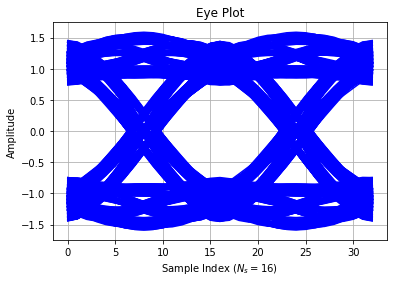

In [6]:
ss.eye_plot(x2, 2*Ns, 10*Ns)
plt.xlabel('Sample Index ($N_s = ' + repr(Ns) + '$)');

# Scatter plot

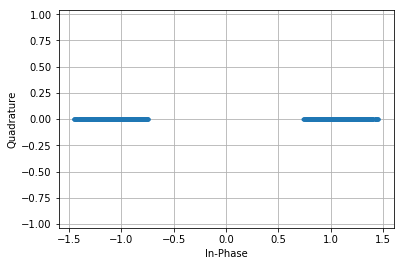

In [7]:
yI, yQ = ss.scatter(x2, Ns, 10*Ns);
plt.plot(yI,yQ,'.');
plt.axis('equal');
plt.ylabel("Quadrature");
plt.xlabel("In-Phase");
plt.grid();
plt.show();